In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import datetime

In [81]:
seasons = range(1,34)
url = "https://www.imdb.com/title/tt0096697/episodes?season="

In [116]:
def scrape_simpson_episodes(seasons, url):

    season = []
    date = []
    ep_num = []
    ep_name = []
    rating = []
    no_ratings = []

    for seas in seasons:

        url = "https://www.imdb.com/title/tt0096697/episodes?season="+str(seas)

        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        ep_list = soup.find_all(class_=["list_item odd","list_item even"])

        for i, ep in enumerate(ep_list):
            season.append(seas)
            date.append(ep.find(class_="airdate").text.split("\n")[1].strip())
            ep_num.append(i+1)
            ep_name.append(ep.find("strong").text)
            rating.append(float(ep.find(class_="ipl-rating-star__rating").text))
            no_ratings.append(int(ep.find(class_="ipl-rating-star__total-votes").text.replace("(","").replace(")","").replace(",","")))

    data = {"Season":season, "Date":date, "Episode_Number":ep_num, "Episode_Name":ep_name, "Rating":rating, "No_Ratings":no_ratings}
    
    return data

In [117]:
data = scrape_simpson_episodes(seasons, url)

In [118]:
df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)

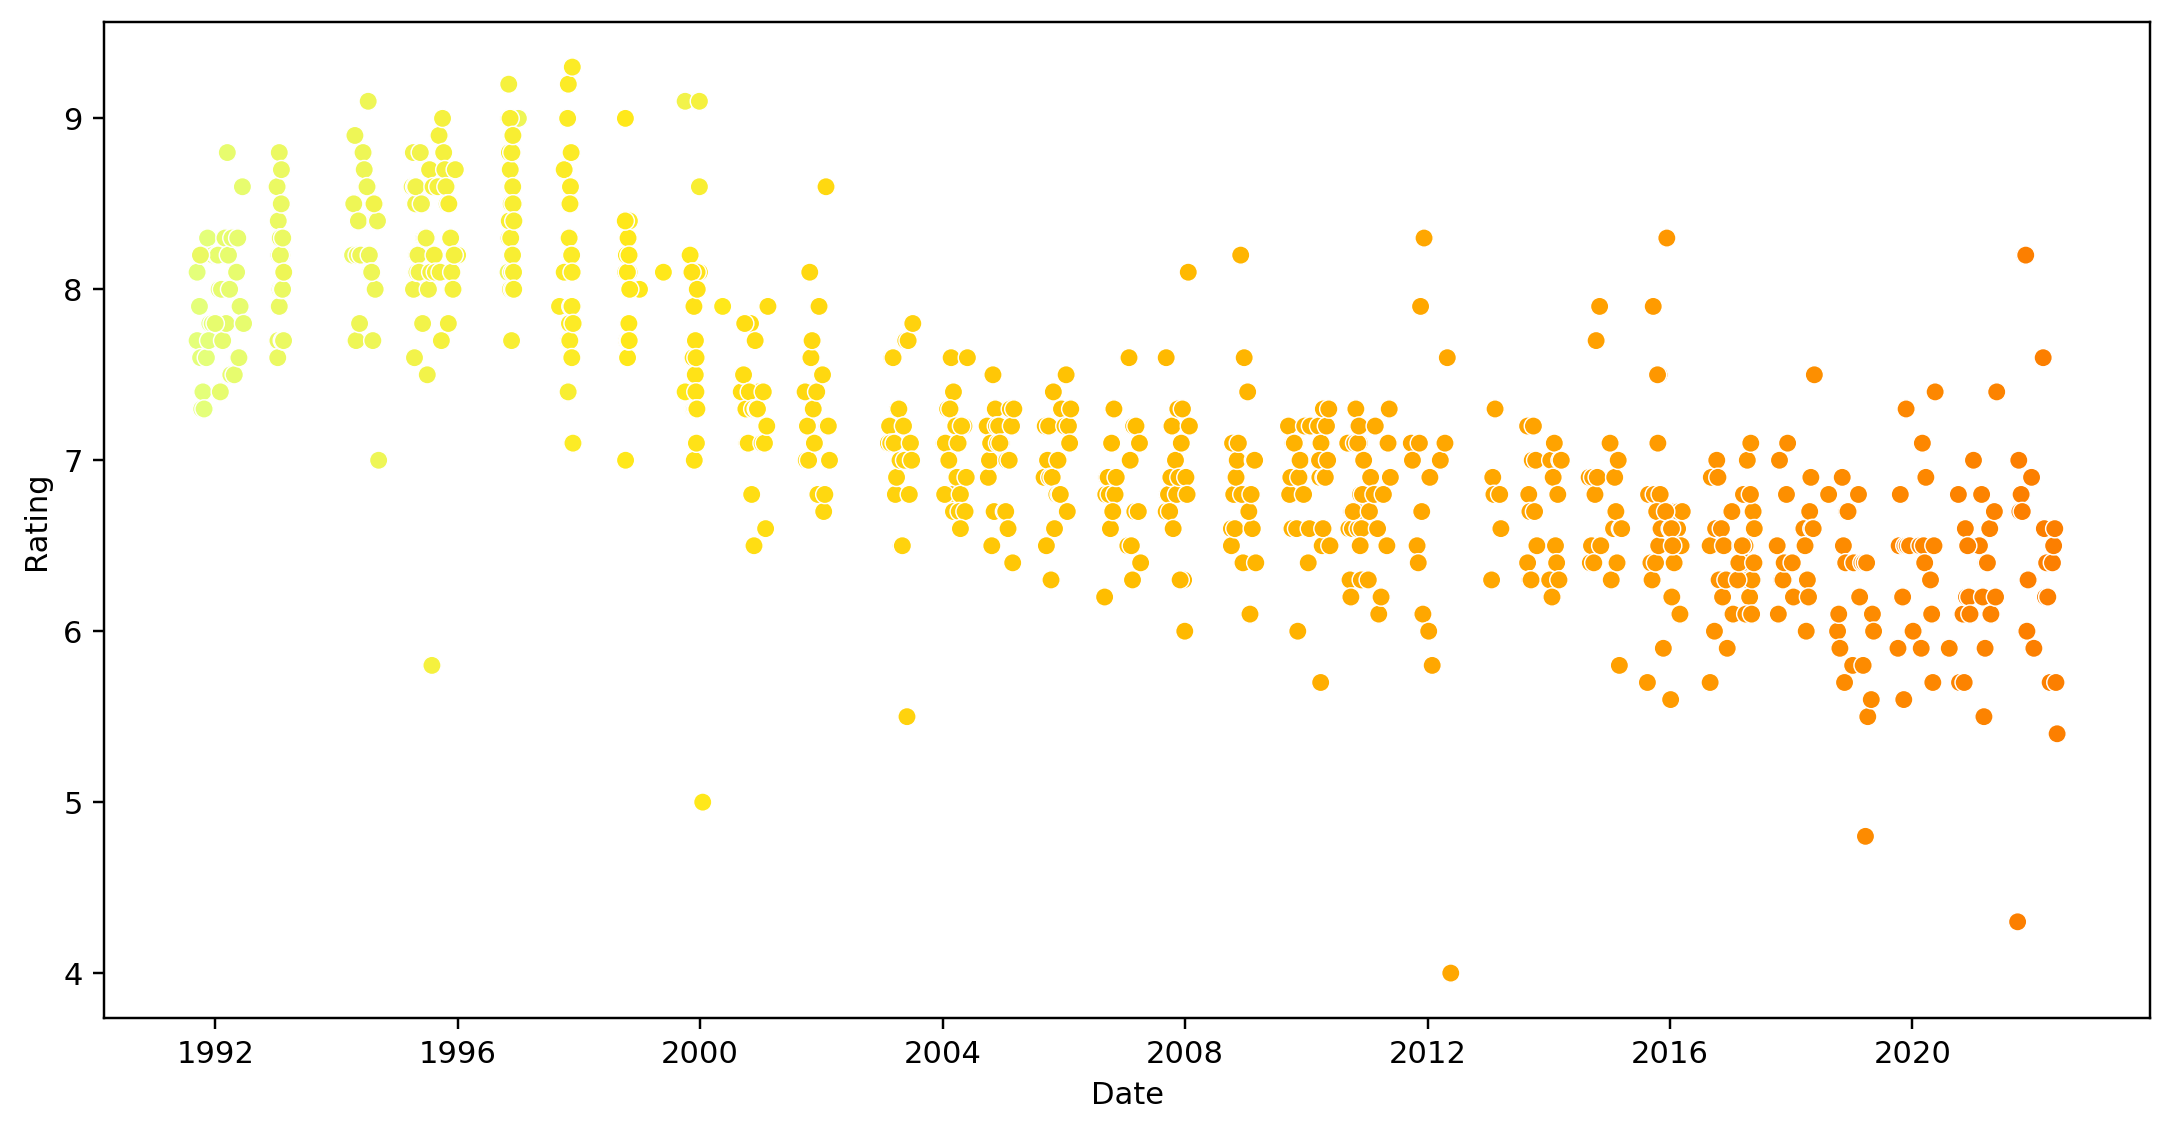

In [156]:
g = sns.scatterplot(x="Date", y="Rating", data=df, hue="Season", palette="Wistia")

plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["figure.dpi"] = 220
plt.legend([],[], frameon=False)
plt.show()

In [162]:
rating_std_seas = df.groupby("Season")["Rating"].std()
rating_avg_seas = df.groupby("Season")["Rating"].mean()

rating_up = rating_avg_seas+rating_std_seas
rating_low = rating_avg_seas-rating_std_seas
rating_std_dates = df.groupby("Season")["Date"].mean()

Text(0, 0.5, 'Average Rating')

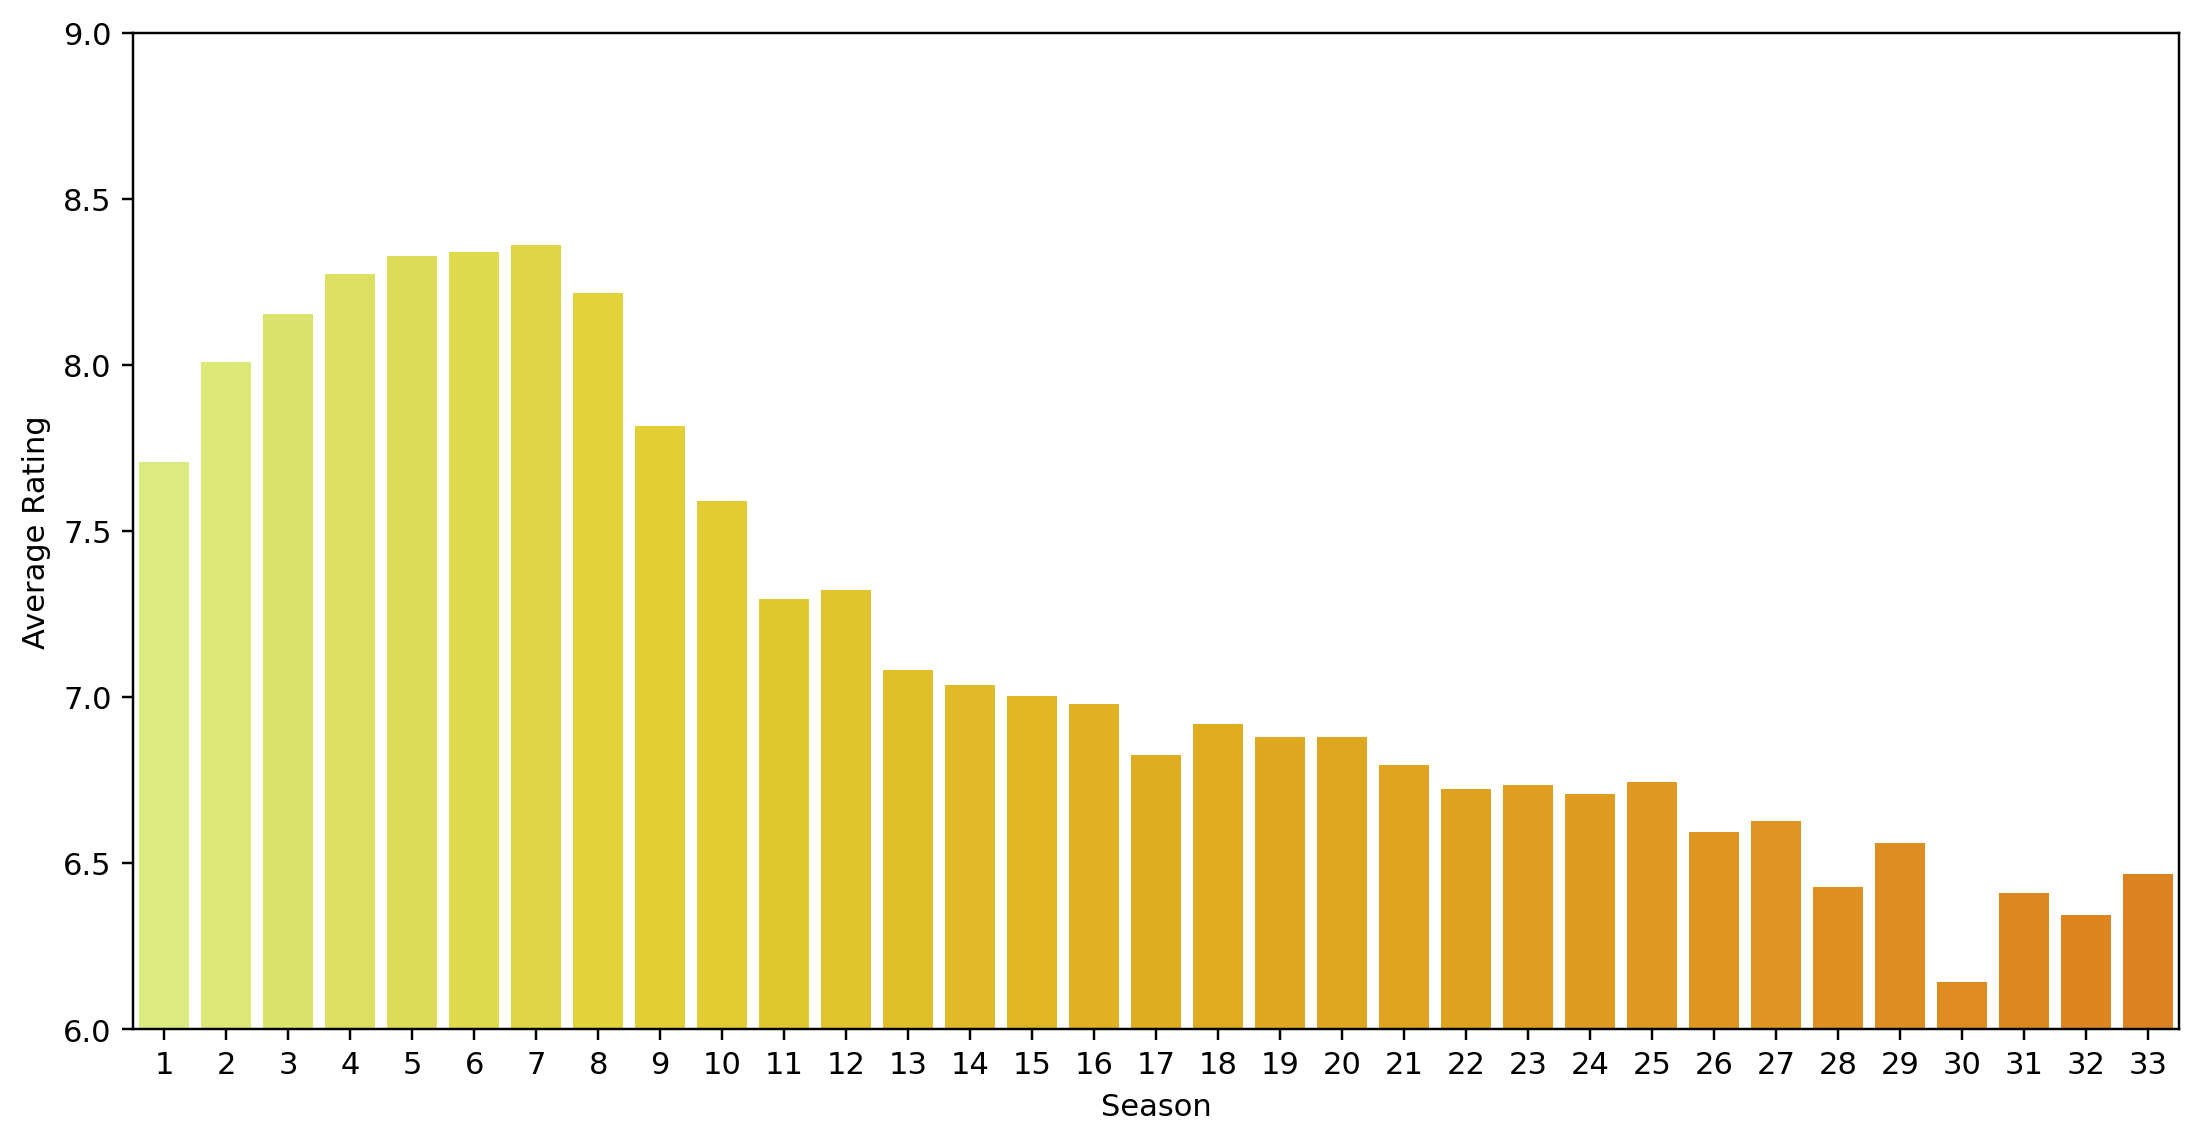

In [397]:
fig, ax = plt.subplots()

sns.barplot(x=rating_avg_seas.index, y=rating_avg_seas.values,palette="Wistia", ax=ax)
ax.set_ylim([6,9])
ax.set_ylabel("Average Rating")

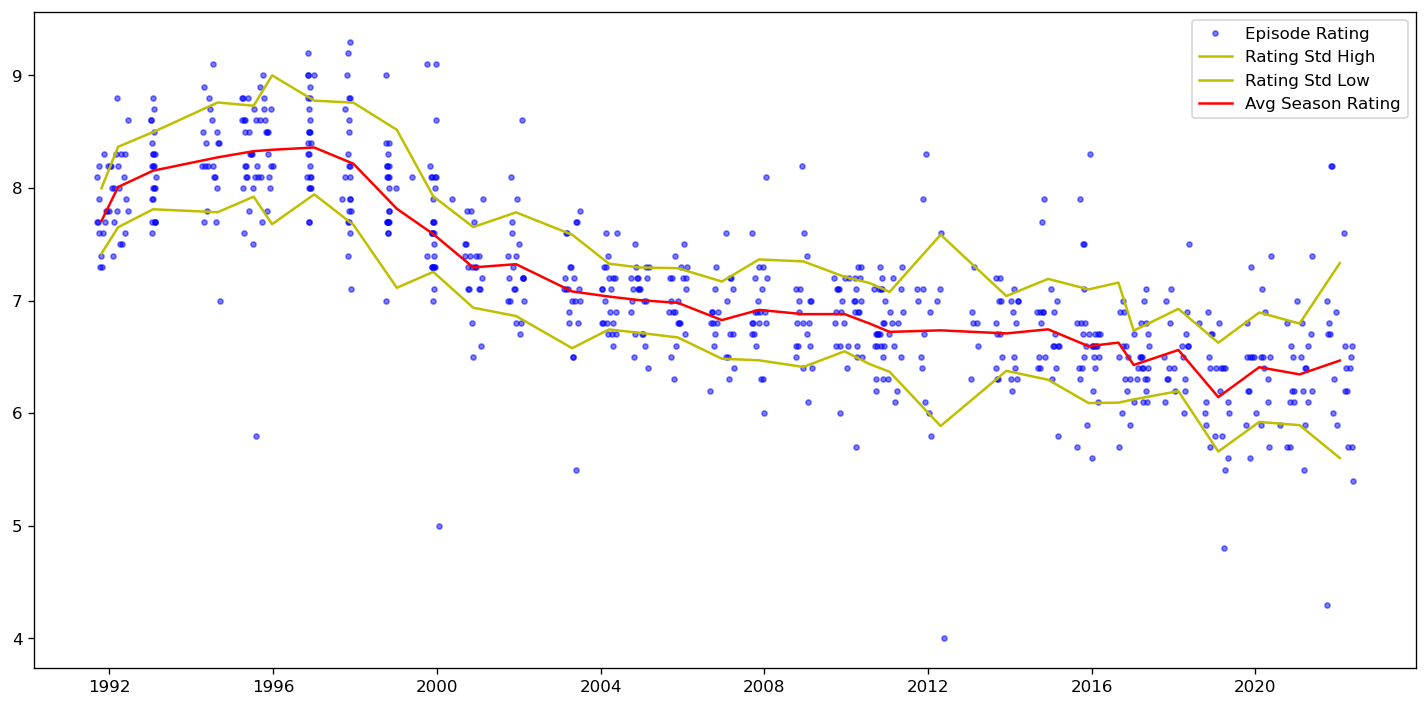

In [178]:
fig, ax = plt.subplots()
ax.plot(df["Date"], df["Rating"], marker=".", linestyle="None",color="b",alpha=0.5)
ax.plot(rating_std_dates, rating_up, color="y")
ax.plot(rating_std_dates, rating_low, color="y")
ax.plot(rating_std_dates, rating_avg_seas, color="r")
plt.legend(["Episode Rating","Rating Std High","Rating Std Low","Avg Season Rating"])
plt.tight_layout()
fig.set_dpi(120)

Text(0.5, 1.0, 'No. of average Season Ratings')

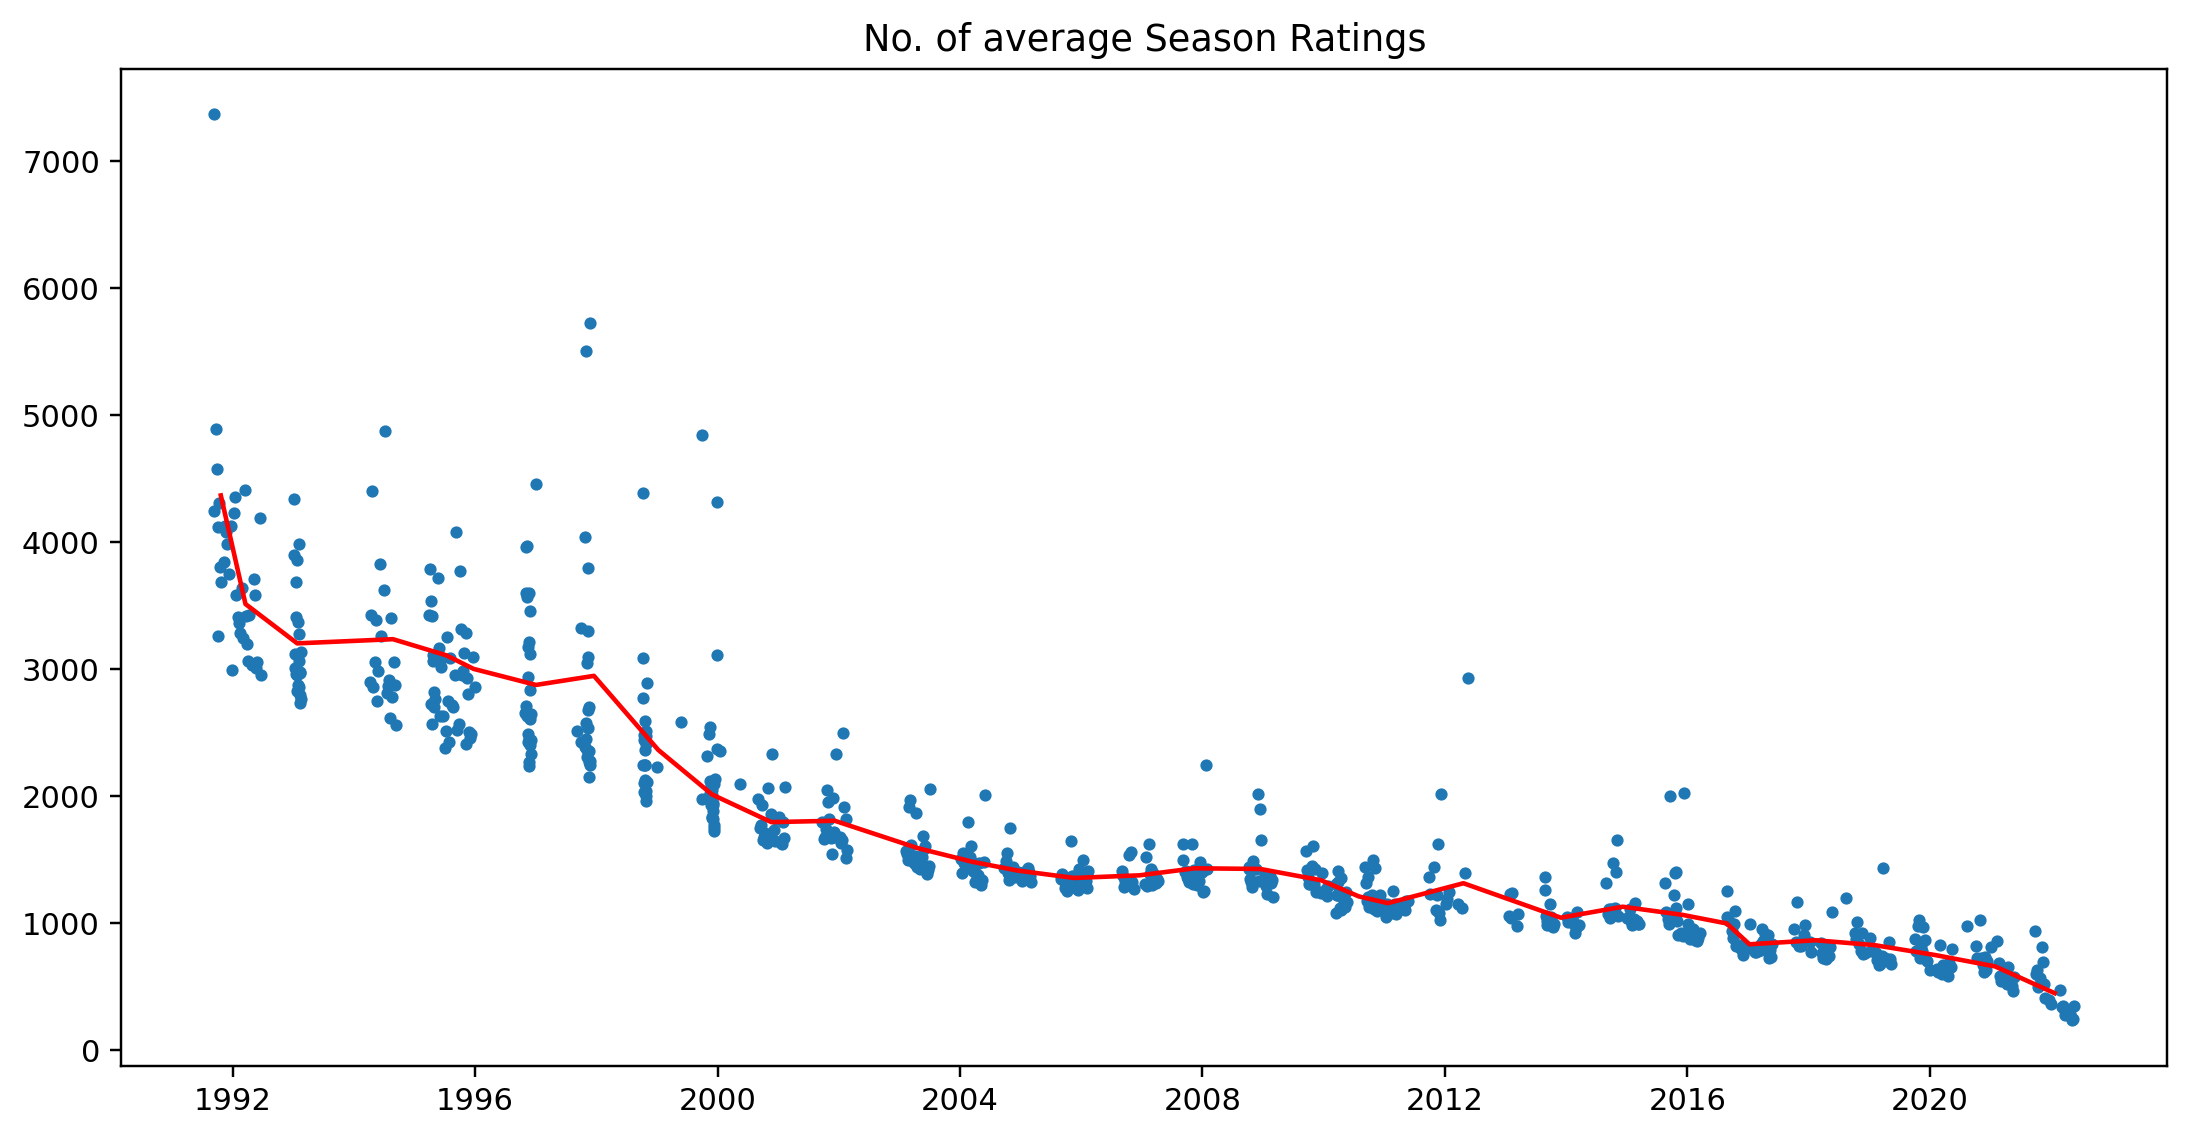

In [195]:
avg_no_raters = df.groupby("Season")["No_Ratings"].mean()
fig, ax = plt.subplots()
ax.plot(df["Date"],df["No_Ratings"],marker=".",linestyle="none")
ax.plot(rating_std_dates,avg_no_raters, color="r")
ax.set_title("No. of average Season Ratings")

In [218]:
seas_length = (df.groupby("Season").last()["Date"] - df.groupby("Season").first()["Date"])

In [227]:
test ="Lisa's big test"

"LISA" in test.upper()

True

In [404]:
bart = {"No":0, "Rating":[],"Outp":[]}
homer= {"No":0, "Rating":[],"Outp":[]}
marge = {"No":0, "Rating":[],"Outp":[]}
maggie = {"No":0, "Rating":[],"Outp":[]}
lisa = {"No":0, "Rating":[],"Outp":[]}

for i in df.index:
    
    if "LISA" in df.iloc[i]["Episode_Name"].upper():
        lisa["No"]+=1
        lisa["Rating"].append(df.iloc[i]["Rating"])
        lisa["Outp"].append(df.iloc[i]["Rating"] - rating_avg_seas[df.iloc[i]["Season"]])
    
    elif "BART" in df.iloc[i]["Episode_Name"].upper():
        bart["No"]+=1
        bart["Rating"].append(df.iloc[i]["Rating"])
        bart["Outp"].append(df.iloc[i]["Rating"] - rating_avg_seas[df.iloc[i]["Season"]])
    
    elif "MARGE" in df.iloc[i]["Episode_Name"].upper():
        marge["No"]+=1
        marge["Rating"].append(df.iloc[i]["Rating"])
        marge["Outp"].append(df.iloc[i]["Rating"] - rating_avg_seas[df.iloc[i]["Season"]])
    
    elif "HOMER" in df.iloc[i]["Episode_Name"].upper():
        homer["No"]+=1
        homer["Rating"].append(df.iloc[i]["Rating"])
        homer["Outp"].append(df.iloc[i]["Rating"] - rating_avg_seas[df.iloc[i]["Season"]])
    
    elif "MAGGIE" in df.iloc[i]["Episode_Name"].upper():
        maggie["No"]+=1
        maggie["Rating"].append(df.iloc[i]["Rating"])
        maggie["Outp"].append(df.iloc[i]["Rating"] - rating_avg_seas[df.iloc[i]["Season"]])

Homer's Odyssey
Homer's Night Out
Dancin' Homer
Homer Defined
Homer Alone
Homer at the Bat
Colonel Homer
Homer the Heretic
Homer's Triple Bypass
Homer's Barbershop Quartet
Homer Goes to College
The Last Temptation of Homer
Homer the Vigilante
Homer and Apu
Deep Space Homer
Homer Loves Flanders
Homer Badman
Homer the Great
Homer vs. Patty and Selma
King Size Homer
Team Homer
Homer the Smithers
Homerpalooza
The Homer They Fall
Homer's Phobia
Homer vs. the 18th Amendment
Homer's Enemy
The City of New York vs. Homer Simpson
Homer Simpson in: 'Kidney Trouble'
Homer to the Max
Maximum Homerdrive
Homer vs. Dignity
Hungry Hungry Homer
Homer the Moe
Homer and Ned's Hail Mary Pass
Mobile Homer
Home Away from Homer
See Homer Run
Homer's Paternity Coot
Homer Simpson, This Is Your Wife
The Mook, the Chef, the Wife and Her Homer
Please Homer, Don't Hammer 'Em
Homerazzi
Homer of Seville
Coming to Homerica
Homer the Whopper
Homer the Father
Homer Scissorhands
Politically Inept, with Homer Simpson
Home

In [389]:
char_list = [bart, homer, marge, maggie, lisa]
char_names = ["Bart", "Homer", "Marge", "Maggie", "Lisa"]
new_chars = {"No. Episodes":[],"Avg. Rating":[],"Rating_Alpha":[], "Name":char_names}

for i, b in enumerate(char_list):
    new_chars["No. Episodes"].append(b["No"])
    new_chars["Avg. Rating"].append(np.mean(b["Rating"]))
    new_chars["Rating_Alpha"].append(np.mean(b["Outp"]))
    
char_df = pd.DataFrame(new_chars)

In [390]:
char_df

,No. Episodes,Avg. Rating,Rating_Alpha,Name
0,48,7.495833,0.032416,Bart
1,53,7.713208,0.093131,Homer
2,22,7.377273,-0.119472,Marge
3,3,7.633333,0.403622,Maggie
4,42,7.409524,-0.133965,Lisa


(7.0, 8.0)

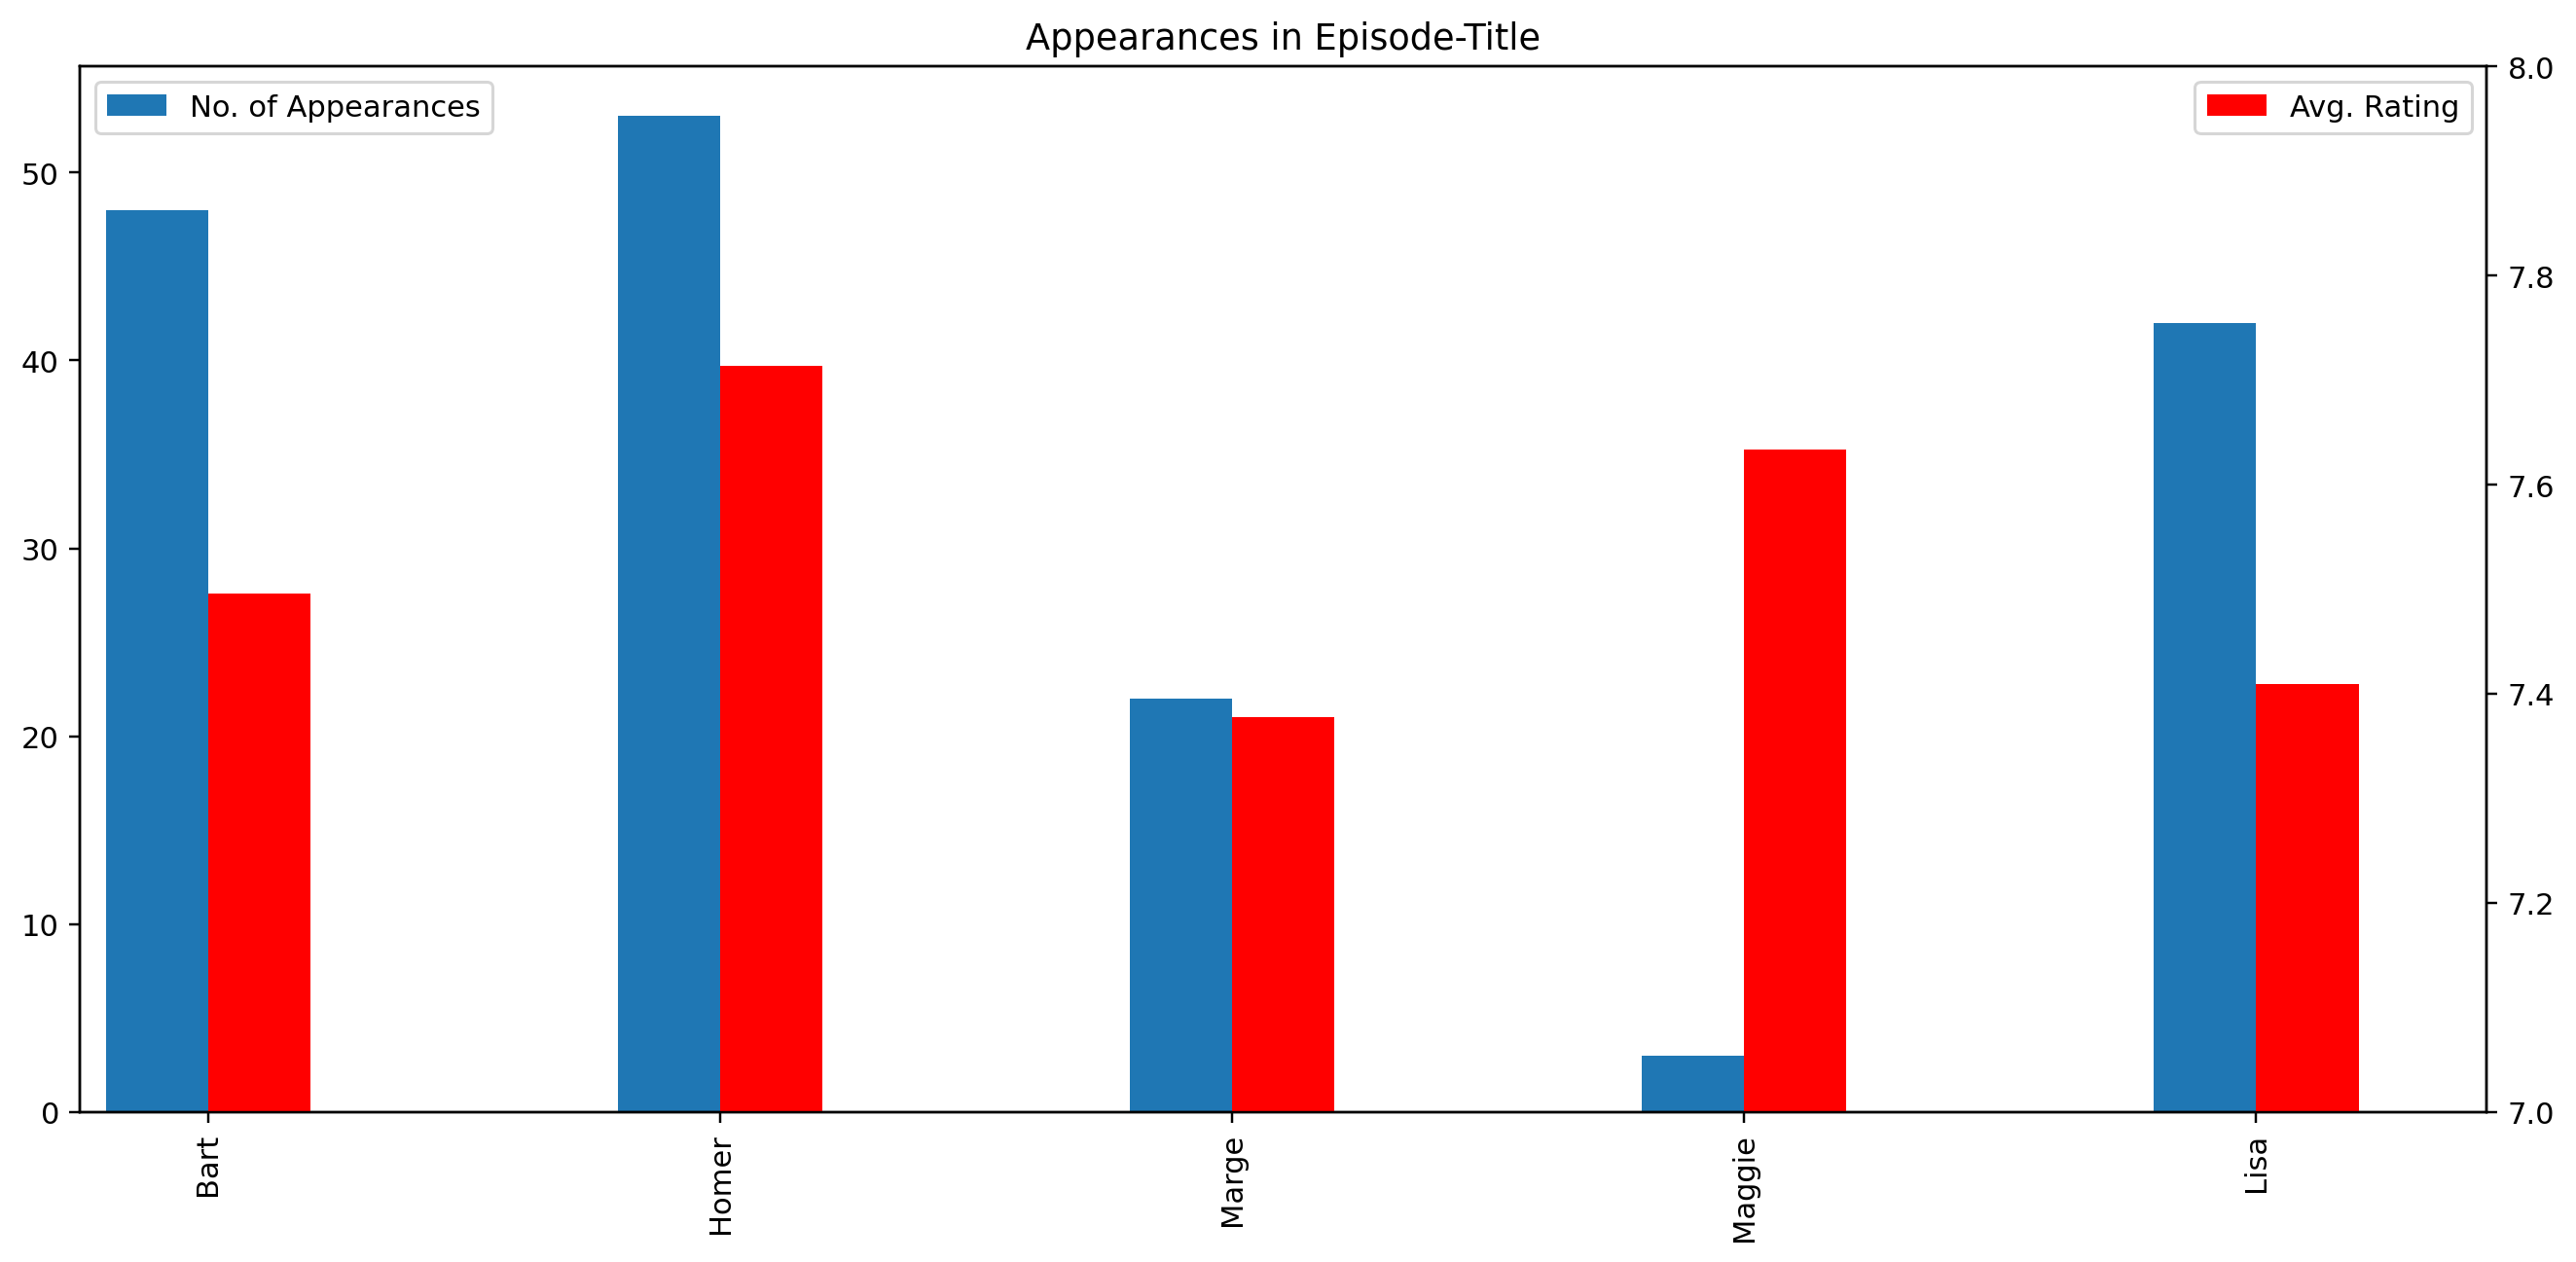

In [352]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax2 = ax.twinx()
width = 0.2
char_df["No. Episodes"].plot(kind="bar", ax=ax,position=1,width=width)
char_df["Avg. Rating"].plot(kind="bar", ax=ax2, position=0,color="red",width=width)
plt.xticks(range(0,5), char_df["Name"])

ax.set_title("Appearances in Episode-Title")
ax2.legend(loc=0)
ax.legend(["No. of Appearances"],loc=2)
plt.tight_layout()
ax2.set_ylim([7,8])

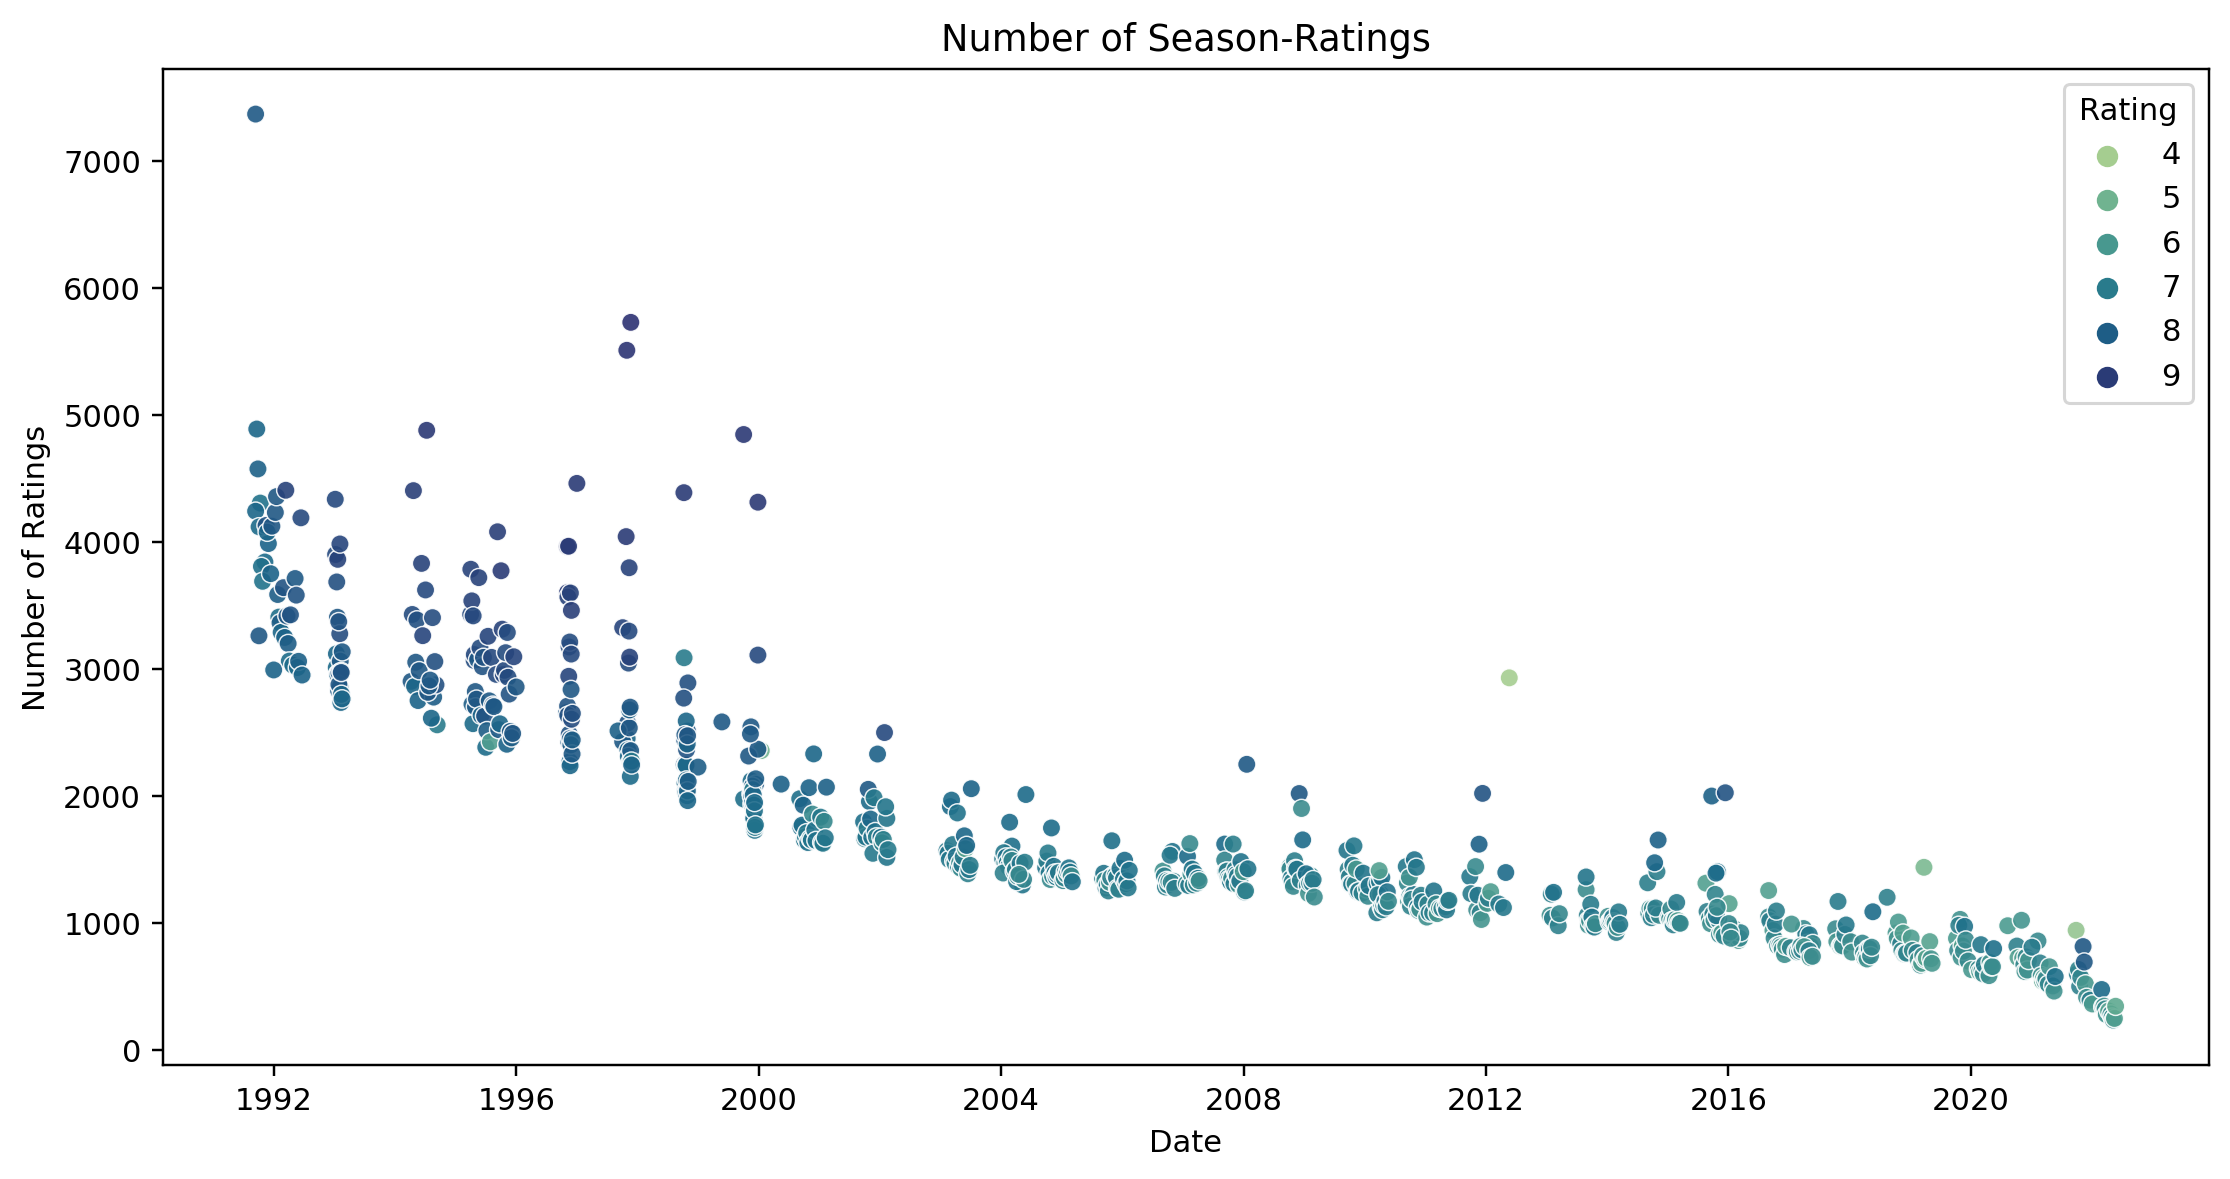

In [363]:
ax = sns.scatterplot(x="Date",y="No_Ratings",hue="Rating",data=df, alpha=0.9,palette="crest")
ax.set_ylabel("Number of Ratings")
ax.set_title("Number of Season-Ratings")

plt.show()

In [367]:
std = df["Rating"].std()
mean = df["Rating"].mean()

In [370]:
z_score = []

for i in char_df["Avg. Rating"]:
    z_score.append((i-mean)/std)

Text(0.5, 1.0, 'Rating Alpha for Episodes with Name in Title')

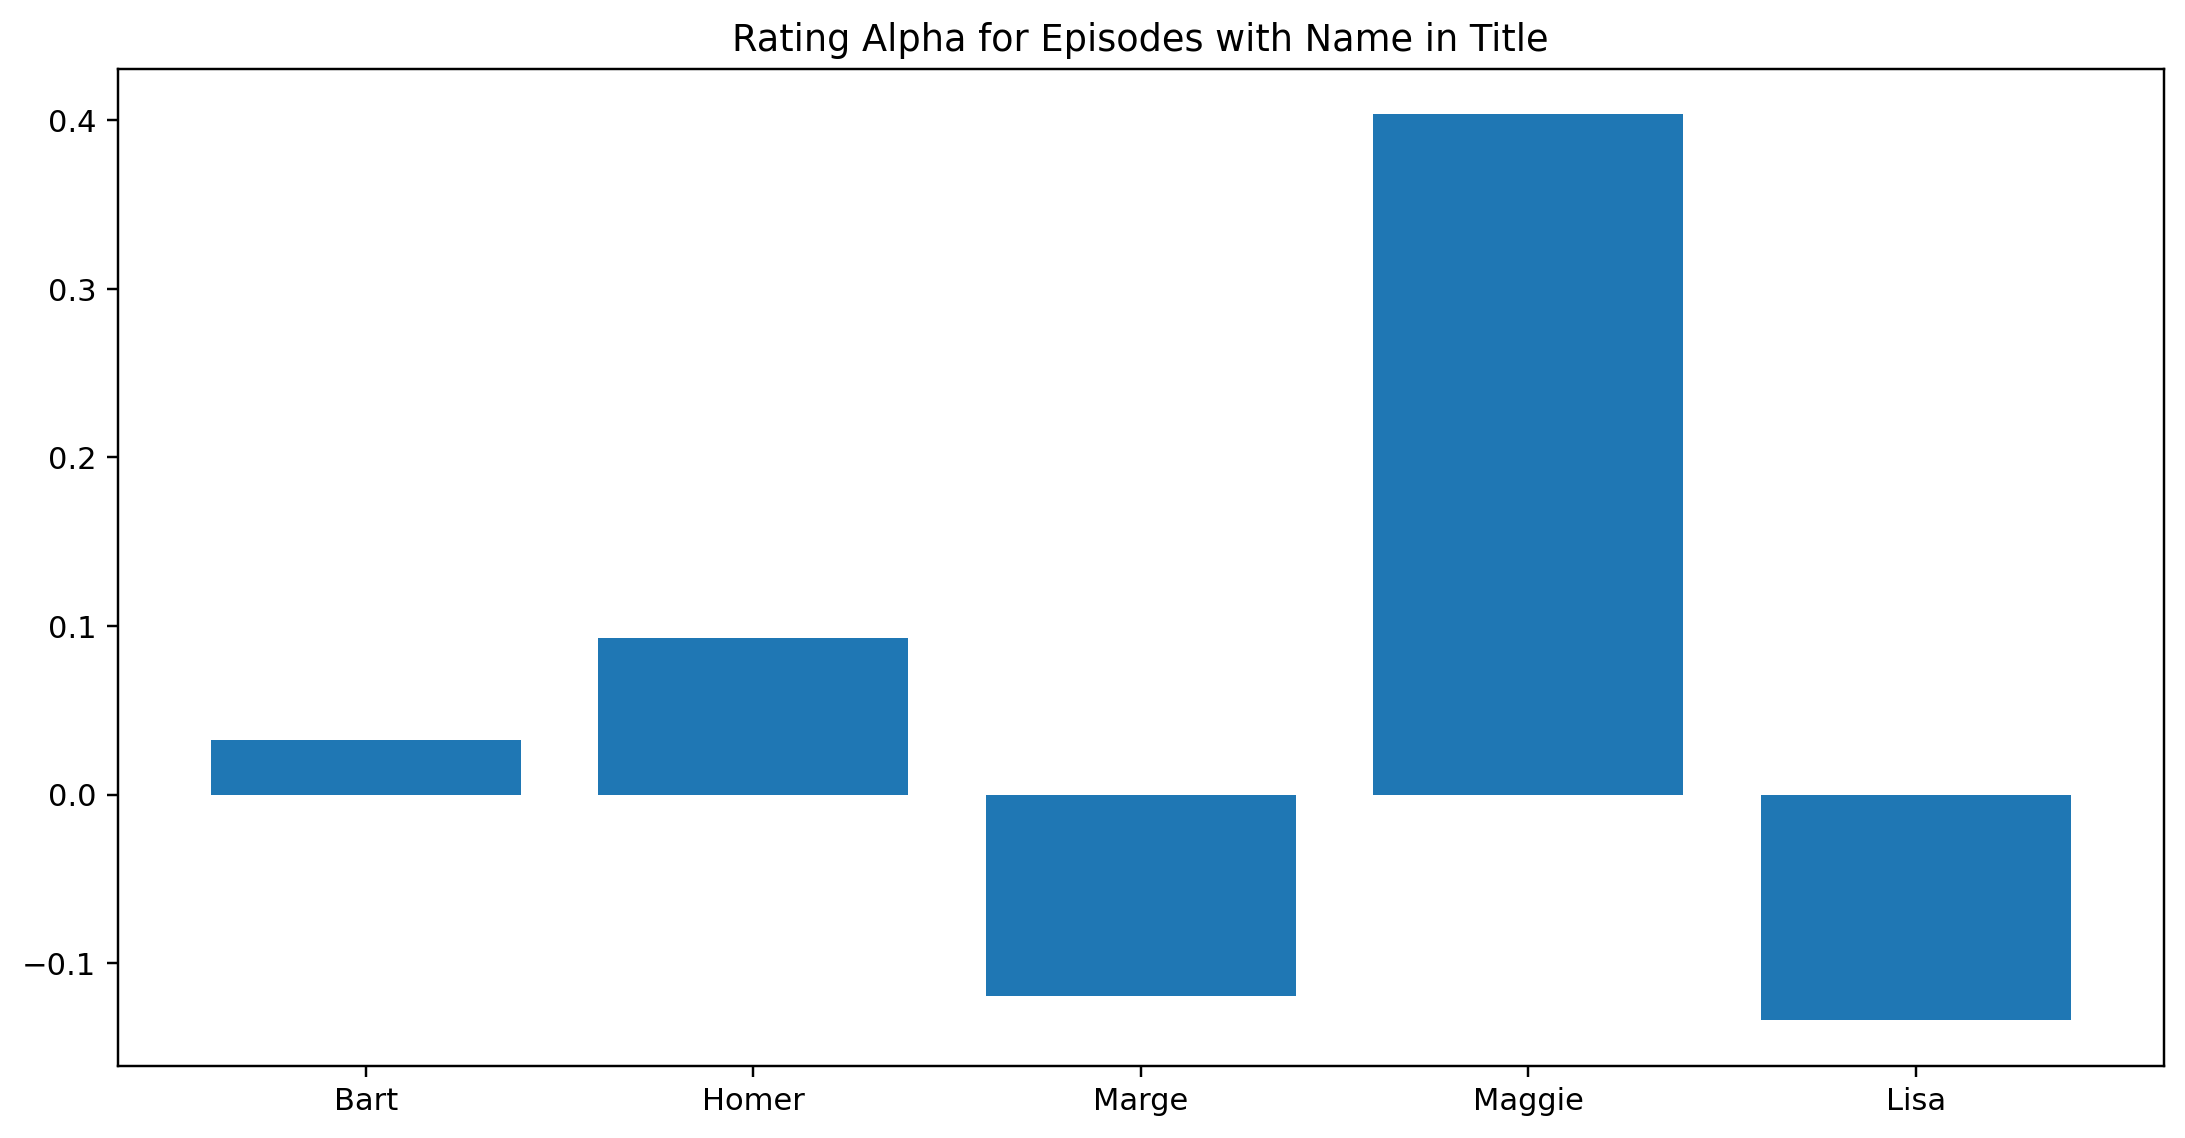

In [392]:
fig, ax = plt.subplots()

ax.bar(char_df["Name"],char_df["Rating_Alpha"])

ax.set_title("Rating Alpha for Episodes with Name in Title")

In [403]:
df.sort_values("Rating",ascending=False).head(30)

,Season,Date,Episode_Number,Episode_Name,Rating,No_Ratings
175,8,1997-11-21,23,Homer's Enemy,9.3,5727
154,8,1997-10-28,2,You Only Move Twice,9.2,5507
127,6,1996-11-03,25,Who Shot Mr. Burns? Part One,9.2,3962
70,4,1994-07-10,12,Marge vs. the Monorail,9.1,4877
82,5,1999-10-02,2,Cape Feare,9.1,4844
108,6,1999-12-27,6,Treehouse of Horror V,9.1,4311
114,6,1995-10-01,12,Homer the Great,9.0,3771
134,7,1996-11-11,7,King Size Homer,9.0,3964
75,4,1996-12-31,17,Last Exit to Springfield,9.0,4459
178,9,1998-10-07,1,The City of New York vs. Homer Simpson,9.0,4386
